Nhập dữ liệu và kiểm tra việc tiếp nhận dữ liệu

In [1]:
# Nhập thư viện pandas và gán tên là 'pd'
import pandas as pd

# Đọc một tập tin CSV vào DataFrame bằng pandas
# Đường dẫn đến tập tin CSV là 'C:/Users/GIGABYTE/Downloads/dataset.csv'
# DataFrame kết quả được gán cho biến 'raw'
raw = pd.read_csv('C:/Users/GIGABYTE/Downloads/dataset.csv')

# Hiển thị nội dung của DataFrame 'raw'
raw


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [2]:
# Ngôn ngữ
languages = set(raw['language'])
print('Languages', languages)
print('========')

# Ví dụ về nhiều ngôn ngữ được lấy từ đầu và cuối
print('Swedish & English:', raw['Text'][1])
print('Thai & English:', raw['Text'][2])
print('Chinese & English:', raw['Text'][21998])


Languages {'Indonesian', 'Thai', 'Portugese', 'Latin', 'Russian', 'Estonian', 'Pushto', 'Turkish', 'Persian', 'Hindi', 'Dutch', 'Swedish', 'Romanian', 'English', 'Japanese', 'Korean', 'Urdu', 'Chinese', 'French', 'Arabic', 'Tamil', 'Spanish'}
Swedish & English: sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris 
Thai & English: ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม
Chinese & English: 年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由美國的獨立廠牌bip·record發行，以外國輸入盤的形式在日本發售，旋即被抢购一空。其後於月日發行以倉木麻衣名義發行的首張日文單曲《love day after tomorrow》，正式於日本出道。這張單曲初動銷量只得約萬張，可是其後每週銷量一直上升，並於年月正式突破百萬銷量，合计万张。成為年最耀眼的新人歌手。


Tiền xử lý dữ liệu và kiểm tra kết quả sau khi đã xử lý

In [3]:
import re
import unicodedata
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    # Loại bỏ các thẻ HTML nếu có
    text = re.sub(r'<.*?>', '', text)
    
    # Loại bỏ các địa chỉ URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Loại bỏ dấu câu
    text = re.sub(r'[^\w\s]', '', text)
    
    # Loại bỏ tất cả các ký tự khoảng trắng
    text = re.sub(r'\s', '', text)
    
    # Loại bỏ các từ dừng
    stopwords = ENGLISH_STOP_WORDS
    text = ' '.join([word for word in text.split() if word not in stopwords])
    
    return text


In [4]:
# In ra một mẫu của cột 'Text' trước khi làm sạch
print("Before cleaning:")
print(raw['Text'].head())

# Áp dụng hàm clean_text cho cột 'Text'
raw['Text'] = raw['Text'].apply(clean_text)

# In ra một mẫu của cột 'Text' sau khi làm sạch
print("\nAfter cleaning:")
print(raw['Text'].head())


Before cleaning:
0    klement gottwaldi surnukeha palsameeriti ning ...
1    sebes joseph pereira thomas  på eng the jesuit...
2    ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3    விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4    de spons behoort tot het geslacht haliclona en...
Name: Text, dtype: object

After cleaning:
0    klementgottwaldisurnukehapalsameeritiningpaigu...
1    sebesjosephpereirathomaspåengthejesuitsandthes...
2    ถนนเจรญกรงอกษรโรมนthanoncharoenkrungเรมตงแตถนน...
3    வசகபபடடனமதமழசசஙகததஇநதபபததரகவசகபபடடனஆசரயரசமபததட...
4    desponsbehoorttothetgeslachthaliclonaenbehoort...
Name: Text, dtype: object


Tách dữ liệu và kiểm tra dữ liệu sau khi đã tách

In [5]:
# Nhập hàm train_test_split từ module sklearn.model_selection
from sklearn.model_selection import train_test_split

# Trích xuất cột 'Text' từ DataFrame 'raw' và gán nó cho biến 'X'
X = raw['Text']

# Trích xuất cột 'language' từ DataFrame 'raw' và gán nó cho biến 'y'
y = raw['language']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra sử dụng train_test_split
# Tham số test_size được đặt là 0.2, nghĩa là 20% dữ liệu sẽ được sử dụng để kiểm tra
# Tham số random_state được đặt là 42 để đảm bảo tái tạo lại được
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In ra độ dài của tập huấn luyện cho đặc trưng X
print("X train:", len(X_train))

# In ra độ dài của tập kiểm tra cho đặc trưng X
print("X test:", len(X_test))

# In ra độ dài của tập huấn luyện cho mục tiêu y
print("Y train:", len(y_train))

# In ra độ dài của tập kiểm tra cho mục tiêu y
print("Y test:", len(y_test))


X train: 17600
X test: 4400
Y train: 17600
Y test: 4400


Thực hiện trích xuất tách từ theo uni-gram và kiểm tra kết quả sau khi tách

In [6]:
# Nhập CountVectorizer từ module sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Tạo một CountVectorizer cho các unigram (ký tự)
# Analyzer được đặt là 'char' để coi mỗi ký tự như một đặc trưng riêng biệt
# Ngram_range được đặt là (1, 1) để trích xuất các unigram
unigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))

# Chuyển đổi dữ liệu huấn luyện thành ma trận tần suất của các unigram
X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)

# Chuyển đổi dữ liệu kiểm tra thành ma trận tần suất của các unigram
X_unigram_test_raw = unigramVectorizer.transform(X_test)

# Lấy tên của các đặc trưng unigram
unigramFeatures = unigramVectorizer.get_feature_names_out()

# In ra số lượng unigram trong tập huấn luyện
print('Number of unigrams in the training set:', len(unigramFeatures))


Number of unigrams in the training set: 6572


In [7]:
# In ra 100 đặc trưng unigram đầu tiên 
print("Sample unigram features:", unigramFeatures[:100])

Sample unigram features: ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'ª' '²' '³' 'µ' 'º' '½' 'ß' 'à' 'á' 'â'
 'ã' 'ä' 'å' 'æ' 'ç' 'è' 'é' 'ê' 'ë' 'ì' 'í' 'î' 'ï' 'ð' 'ñ' 'ò' 'ó' 'ô'
 'õ' 'ö' 'ø' 'ù' 'ú' 'û' 'ü' 'ý' 'ā' 'ă' 'ą' 'ć' 'č' 'đ' 'ē' 'ė' 'ę' 'ě'
 'ğ' 'ġ' 'ħ' 'ī' 'ĭ' 'ı' 'ķ' 'ĺ' 'ļ' 'ľ' 'ł' 'ń' 'ņ' 'ň' 'ŋ' 'ō' 'ŏ' 'ő'
 'œ' 'ř' 'ś' 'ş' 'š' 'ţ' 'ť' 'ũ' 'ū' 'ŭ']


Xây dựng từ điển đặc trưng 

In [8]:
# Nhập thư viện numpy và gán tên là 'np'
import numpy as np

# Định nghĩa hàm để tổng hợp các gram theo ngôn ngữ
def train_lang_dict(X_raw_counts, y_train):
    #Khởi tạo một từ điển rỗng để lưu trữ số lượng gram tổng hợp cho từng ngôn ngữ
    lang_dict = {}
    
    # Lặp qua từng hàng trong dữ liệu huấn luyện
    for i in range(len(y_train)):
        # Lấy nhãn ngôn ngữ cho hàng hiện tại
        lang = y_train[i]
        
        # Chuyển đổi số lượng gram thô cho hàng hiện tại thành mảng NumPy
        v = np.array(X_raw_counts[i])
        
        # Nếu ngôn ngữ chưa có trong lang_dict, tạo một mục mới
        if not lang in lang_dict:
            lang_dict[lang] = v
        else:
            # Nếu ngôn ngữ đã có trong lang_dict, cộng dồn số lượng gram vào số lượng hiện có
            lang_dict[lang] += v
    
    # Chuyển đổi số lượng thành tần suất tương đối cho từng ngôn ngữ
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)
    
    # Trả về từ điển chứa tần suất tương đối của các gram được tổng hợp theo ngôn ngữ
    return lang_dict

# Áp dụng hàm để tổng hợp các unigram và nhãn ngôn ngữ trong tập huấn luyện
language_dict_unigram = train_lang_dict(X_unigram_train_raw.toarray(), y_train.values)

# Định nghĩa hàm để thu thập các ký tự quan trọng theo ngôn ngữ
def getRelevantCharsPerLanguage(features, language_dict, significance=1e-5):
    # Khởi tạo một từ điển rỗng để lưu trữ các ký tự quan trọng cho từng ngôn ngữ
    relevantCharsPerLanguage = {}
    
    # Lặp qua từng ngôn ngữ trong language_dict
    for lang in language_dict:
        # Khởi tạo một danh sách rỗng để lưu trữ các ký tự quan trọng cho ngôn ngữ hiện tại
        chars = []
        relevantCharsPerLanguage[lang] = chars
        
        # Lấy mảng tần suất tương đối cho ngôn ngữ hiện tại
        v = language_dict[lang]
        
        # Lặp qua từng tần suất unigram trong mảng
        for i in range(len(v)):
            # Nếu tần suất unigram lớn hơn mức độ quan trọng được chỉ định,
            # thêm ký tự unigram tương ứng vào danh sách các ký tự quan trọng
            if v[i] > significance:
                chars.append(features[i])
    
    # Trả về từ điển chứa danh sách các ký tự unigram quan trọng cho từng ngôn ngữ
    return relevantCharsPerLanguage

# Áp dụng hàm để lấy các ký tự quan trọng cho từng ngôn ngữ
relevantCharsPerLanguage = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram)

# In ra số lượng các ký tự unigram quan trọng cho từng ngôn ngữ
for lang in relevantCharsPerLanguage:
    print(lang, len(relevantCharsPerLanguage[lang]))


Thai 119
Swedish 68
Tamil 110
Russian 68
Urdu 107
Chinese 3190
Spanish 49
English 49
Persian 76
Pushto 175
Romanian 91
Arabic 71
Portugese 56
Turkish 100
Estonian 77
Hindi 115
Dutch 48
Latin 118
French 58
Korean 1681
Indonesian 77
Japanese 2009


Trực quan hóa dữ liệu

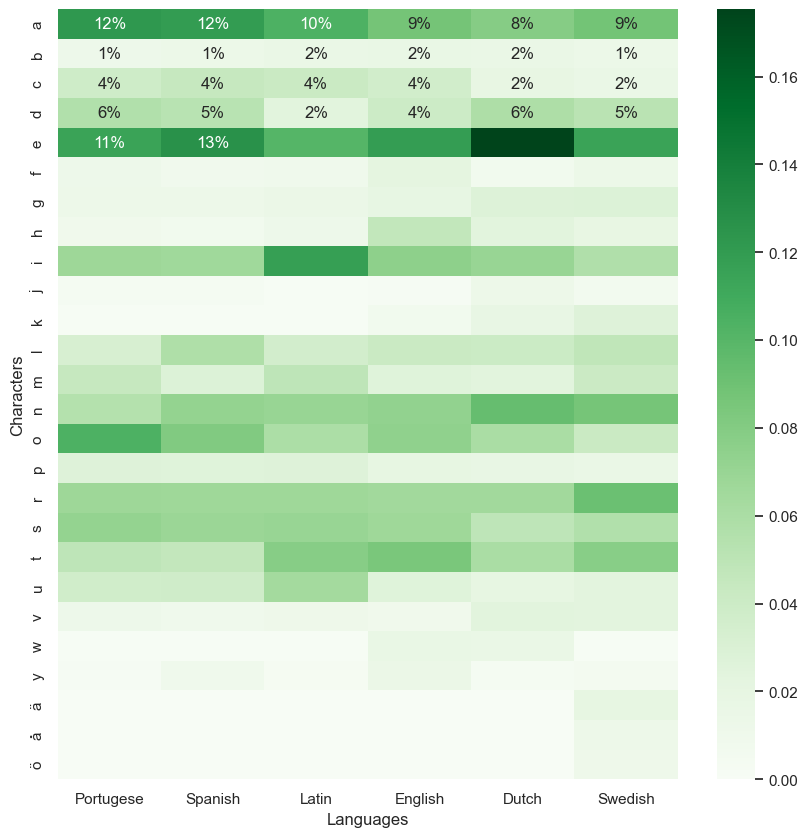

In [9]:
# Định nghĩa một danh sách các ngôn ngữ Châu Âu
europeanLanguages = ['Portugese', 'Spanish', 'Latin', 'English', 'Dutch', 'Swedish']

# Lấy các ký tự quan trọng cho các ngôn ngữ Châu Âu với mức độ quan trọng là 1%
relevantChars_OnePercent = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram, 1e-2)

# Thu thập và sắp xếp các ký tự quan trọng
europeanCharacters = []
for lang in europeanLanguages:
    europeanCharacters += relevantChars_OnePercent[lang]

# Loại bỏ các ký tự trùng lặp, chuyển đổi thành danh sách và sắp xếp
europeanCharacters = list(set(europeanCharacters))
europeanCharacters.sort()

# Xây dựng dữ liệu cho bản đồ nhiệt
indices = [list(unigramFeatures).index(f) for f in europeanCharacters]
data = []

# Lặp qua từng ngôn ngữ Châu Âu
for lang in europeanLanguages:
    # Thêm tần suất các ký tự unigram quan trọng cho ngôn ngữ hiện tại
    data.append(language_dict_unigram[lang][indices])

# Tạo DataFrame cho bản đồ nhiệt
df = pd.DataFrame(np.array(data).T, columns=europeanLanguages, index=europeanCharacters)
df.index.name = 'Characters'
df.columns.name = 'Languages'

# Vẽ bản đồ nhiệt sử dụng seaborn và matplotlib
import seaborn as sn
import matplotlib.pyplot as plt

# Đặt tỷ lệ font chữ cho nhãn
sn.set(font_scale=0.8)

# Đặt kích thước cho hình vẽ bản đồ nhiệt
sn.set(rc={'figure.figsize':(10, 10)})

# Vẽ bản đồ nhiệt sử dụng DataFrame
sn.heatmap(df, cmap="Greens", annot=True, annot_kws={"size": 12}, fmt='.0%')  # Kích thước font chữ cho các chú thích
plt.show()


Thực hiện tách từ theo bi-gram và kiểm tra kết quả sau khi tách

In [10]:
# Nhập CountVectorizer từ module sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Tạo một CountVectorizer cho các bigram (chuỗi hai ký tự)
# Analyzer được đặt là 'char' để coi mỗi ký tự như một đặc trưng riêng biệt
# Ngram_range được đặt là (2, 2) để trích xuất các bigram
bigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))

# Chuyển đổi dữ liệu huấn luyện thành ma trận tần suất của các bigram
X_bigram_train_raw = bigramVectorizer.fit_transform(X_train)

# Chuyển đổi dữ liệu kiểm tra thành ma trận tần suất của các bigram
X_bigram_test_raw = bigramVectorizer.transform(X_test)

# Lấy tên của các đặc trưng bigram
bigramFeatures = bigramVectorizer.get_feature_names_out()

# In ra số lượng bigram
print('Number of bigrams:', len(bigramFeatures))


Number of bigrams: 159652


Xây dựng từ điển đặc trưng và kiểm tra thử

In [11]:
# Huấn luyện một từ điển ngôn ngữ với số lượng bigram
language_dict_bigram = train_lang_dict(X_bigram_train_raw.toarray(), y_train.values)

# Lấy các bigram quan trọng (>1%) cho các ngôn ngữ cụ thể
relevantBigramsPerLanguage = getRelevantCharsPerLanguage(bigramFeatures, language_dict_bigram, significance=1e-2)

# In ra các bigram quan trọng cho các ngôn ngữ cụ thể
print('Spanish:', relevantBigramsPerLanguage['Spanish'])
print('Italian (Latin):', relevantBigramsPerLanguage['Latin'])
print('English:', relevantBigramsPerLanguage['English'])
print('Dutch:', relevantBigramsPerLanguage['Dutch'])
print('Chinese:', relevantBigramsPerLanguage['Chinese'])
print('Japanese:', relevantBigramsPerLanguage['Japanese'])


Spanish: ['ad', 'al', 'an', 'ar', 'as', 'ci', 'co', 'de', 'el', 'en', 'er', 'es', 'la', 'nt', 'on', 'or', 'os', 'ra', 're', 'se', 'te']
Italian (Latin): ['ae', 'an', 'ar', 'at', 'en', 'er', 'es', 'ia', 'ic', 'in', 'is', 'it', 'li', 'ni', 'nt', 'on', 'ra', 'ri', 'st', 'ta', 'te', 'ti', 'tu', 'um', 'us']
English: ['an', 'ar', 'at', 'ed', 'en', 'er', 'es', 'he', 'in', 'nd', 'nt', 'on', 'or', 're', 'st', 'te', 'th', 'ti']
Dutch: ['aa', 'an', 'de', 'ee', 'el', 'en', 'er', 'et', 'ge', 'he', 'ie', 'in', 'nd', 'or', 'st', 'te']
Chinese: []
Japanese: []


Thực hiện tách từ theo cùng lúc cả uni-gram và bi-gram; thực hiện trích xuất theo 1% và kiểm tra kết quả

In [12]:
# Nhập CountVectorizer từ module sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer

# Tạo một CountVectorizer cho hỗn hợp các unigram và bigram (1 đến 2 ký tự)
# Analyzer được đặt là 'char' để coi mỗi ký tự như một đặc trưng riêng biệt
# Ngram_range được đặt là (1, 2) để trích xuất cả unigram và bigram
# Tham số min_df được đặt là 1e-2 để lọc các đặc trưng xuất hiện trong top 1%
top1PrecentMixtureVectorizer = CountVectorizer(analyzer = 'char', ngram_range = (1, 2), min_df = 1e-2)

# Chuyển đổi dữ liệu huấn luyện và kiểm tra thành ma trận tần suất của các unigram và bigram
X_top1Percent_train_raw = top1PrecentMixtureVectorizer.fit_transform(X_train)
X_top1Percent_test_raw = top1PrecentMixtureVectorizer.transform(X_test)

# Huấn luyện một từ điển ngôn ngữ với số lượng unigram và bigram
language_dict_top1Percent = train_lang_dict(X_top1Percent_train_raw.toarray(), y_train.values)

# Lấy tên của các đặc trưng trong top 1%
top1PercentFeatures = top1PrecentMixtureVectorizer.get_feature_names_out()

# In ra độ dài của các đặc trưng
print('Length of features:', len(top1PercentFeatures))
print('')

# Các đặc trưng độc nhất cho từng ngôn ngữ
relevantChars_Top1Percent = getRelevantCharsPerLanguage(top1PercentFeatures, language_dict_top1Percent, 1e-5)
for lang in relevantChars_Top1Percent:
    print("{}: {}".format(lang, len(relevantChars_Top1Percent[lang])))


Length of features: 2849

Thai: 658
Swedish: 556
Tamil: 530
Russian: 531
Urdu: 960
Chinese: 799
Spanish: 507
English: 490
Persian: 638
Pushto: 1050
Romanian: 530
Arabic: 661
Portugese: 531
Turkish: 585
Estonian: 581
Hindi: 590
Dutch: 518
Latin: 534
French: 517
Korean: 702
Indonesian: 491
Japanese: 830


In [13]:
# In ra 100 trích xuất đầu tiên từ danh sách các đặc trưng
for i, feature in enumerate(top1PercentFeatures[:100]):
    print(f'{i+1}: {feature}')


1: a
2: aa
3: ab
4: ac
5: ad
6: ae
7: af
8: ag
9: ah
10: ai
11: aj
12: ak
13: al
14: am
15: an
16: ao
17: ap
18: aq
19: ar
20: as
21: at
22: au
23: av
24: aw
25: ax
26: ay
27: az
28: aç
29: aé
30: aî
31: añ
32: ağ
33: aş
34: aș
35: aț
36: b
37: ba
38: bb
39: bd
40: be
41: bi
42: bl
43: bo
44: br
45: bs
46: bt
47: bu
48: by
49: bé
50: bö
51: bü
52: c
53: ca
54: cc
55: cd
56: ce
57: cg
58: ch
59: ci
60: ck
61: cl
62: cn
63: co
64: cr
65: cs
66: ct
67: cu
68: cy
69: câ
70: că
71: cı
72: d
73: da
74: db
75: dc
76: dd
77: de
78: df
79: dg
80: dh
81: di
82: dj
83: dk
84: dl
85: dm
86: dn
87: do
88: dp
89: dr
90: ds
91: dt
92: du
93: dv
94: dw
95: dy
96: dä
97: då
98: dé
99: dö
100: dü


Xây dựng từ điển đặc trưng và kiểm tra

In [14]:
def getRelevantGramsPerLanguage(features, language_dict, top=50):
    relevantGramsPerLanguage = {}
    for lang in languages:
        grams = []
        relevantGramsPerLanguage[lang] = grams
        v = language_dict[lang]
        
        # Lấy chỉ số của các phần tử đứng đầu 'top' theo thứ tự giảm dần
        sortIndex = (-v).argsort()[:top]
        
        # Thêm các đặc trưng tương ứng vào danh sách
        for i in range(len(sortIndex)):
            grams.append(features[sortIndex[i]])
            
    return relevantGramsPerLanguage

# Lấy top 50 gram cho mỗi ngôn ngữ sử dụng các đặc trưng trong top 1%
top50PerLanguage_dict = getRelevantGramsPerLanguage(top1PercentFeatures, language_dict_top1Percent)

# Thu thập tất cả các gram top 50 duy nhất cho các ngôn ngữ
allTop50 = []
for lang in top50PerLanguage_dict:
    allTop50 += set(top50PerLanguage_dict[lang])

# Loại bỏ các phần tử trùng lặp và lấy các gram top 50 duy nhất
top50 = list(set(allTop50))

# In ra tổng số lượng và số lượng các phần tử duy nhất
print('All items:', len(allTop50))
print('Unique items:', len(top50))


All items: 1100
Unique items: 575


In [15]:
# In ra top 5 trích xuất (n-gram) cho mỗi ngôn ngữ
for lang, grams in top50PerLanguage_dict.items():
    print(f'Top 5 n-grams for {lang}:')
    for i, gram in enumerate(grams[:5]):
        print(f'{i+1}: {gram}')
    print('')  # Thêm dòng trống giữa các ngôn ngữ


Top 5 n-grams for Indonesian:
1: a
2: n
3: e
4: i
5: r

Top 5 n-grams for Thai:
1: า
2: น
3: ร
4: ก
5: อ

Top 5 n-grams for Portugese:
1: a
2: e
3: o
4: s
5: i

Top 5 n-grams for Latin:
1: i
2: a
3: e
4: t
5: s

Top 5 n-grams for Russian:
1: о
2: и
3: е
4: а
5: н

Top 5 n-grams for Estonian:
1: a
2: i
3: e
4: s
5: t

Top 5 n-grams for Pushto:
1: و
2: ا
3: ه
4: ي
5: د

Top 5 n-grams for Turkish:
1: a
2: e
3: i
4: n
5: r

Top 5 n-grams for Persian:
1: ا
2: ی
3: ر
4: د
5: ن

Top 5 n-grams for Hindi:
1: क
2: र
3: स
4: न
5: त

Top 5 n-grams for Dutch:
1: e
2: n
3: a
4: i
5: r

Top 5 n-grams for Swedish:
1: e
2: r
3: a
4: n
5: t

Top 5 n-grams for Romanian:
1: e
2: a
3: i
4: r
5: n

Top 5 n-grams for English:
1: e
2: a
3: t
4: i
5: o

Top 5 n-grams for Japanese:
1: の
2: に
3: た
4: る
5: は

Top 5 n-grams for Korean:
1: 이
2: 의
3: 다
4: 에
5: 는

Top 5 n-grams for Urdu:
1: ا
2: ی
3: ر
4: و
5: ک

Top 5 n-grams for Chinese:
1: 的
2: 年
3: 在
4: 一
5: 中

Top 5 n-grams for French:
1: e
2: a
3: n
4: s
5: i



In [16]:
# In ra 100 trích xuất đầu tiên từ danh sách các n-gram quan trọng
for i, gram in enumerate(top50[:100]):
    print(f'{i+1}: {gram}')

1: แล
2: تا
3: ழ
4: т
5: لت
6: ید
7: 있
8: தல
9: ر
10: ای
11: क
12: अ
13: ำ
14: ए
15: м
16: ष
17: را
18: तह
19: х
20: د
21: н
22: am
23: 대
24: k
25: 로
26: อ
27: ka
28: पर
29: 國
30: سے
31: に
32: 德
33: na
34: on
35: ول
36: ul
37: ண
38: द
39: 되
40: re
41: li
42: จ
43: на
44: 과
45: 为
46: 出
47: าง
48: र
49: う
50: هد
51: ns
52: 国
53: イ
54: 다
55: et
56: ख
57: ม
58: i
59: 和
60: el
61: ad
62: よ
63: てい
64: ط
65: ى
66: n
67: ن
68: ړ
69: ट
70: о
71: सक
72: கள
73: फ
74: ある
75: 中
76: ما
77: ہو
78: ท
79: pa
80: و
81: z
82: ко
83: är
84: ес
85: इ
86: เ
87: ป
88: บ
89: å
90: आ
91: ج
92: ட
93: في
94: nt
95: 成
96: か
97: ri
98: 여
99: tt
100: 년


In [17]:
# Hàm getRelevantColumnIndices
def getRelevantColumnIndices(allFeatures, selectedFeatures):
    relevantColumns = []
    
    # Lặp qua các đặc trưng được chọn
    for feature in selectedFeatures:
        # Tìm các chỉ số nơi mà đặc trưng xuất hiện trong tất cả các đặc trưng
        relevantColumns = np.append(relevantColumns, np.where(allFeatures == feature))
    
    # Chuyển đổi danh sách các chỉ số thành một mảng và ép kiểu thành số nguyên
    return relevantColumns.astype(int)

# Lấy các chỉ số cột liên quan dựa trên các đặc trưng trong top 1% và top 50 gram
relevantColumnIndices = getRelevantColumnIndices(np.array(top1PercentFeatures), top50)

# Trích xuất các cột liên quan từ dữ liệu huấn luyện và kiểm tra
X_top50_train_raw = np.array(X_top1Percent_train_raw.toarray()[:, relevantColumnIndices])
X_top50_test_raw = X_top1Percent_test_raw.toarray()[:, relevantColumnIndices]

# In ra hình dạng của các ma trận kết quả
print('train shape:', X_top50_train_raw.shape)
print('test shape:', X_top50_test_raw.shape)


train shape: (17600, 575)
test shape: (4400, 575)


Tạo sơ đồ và tính toán các thông số sau khi áp dụng mô hình

In [18]:
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
import scipy

# Hàm tiện ích để chuyển đổi các nguồn dữ liệu khác nhau thành mảng NumPy
def toNumpyArray(data):
    data_type = type(data)
    if data_type == np.ndarray:
        return data
    elif data_type == list:
        return np.array(data)
    elif data_type == scipy.sparse.csr.csr_matrix:
        return data.toarray()
    print(data_type)
    return None

# Hàm để chuẩn hóa dữ liệu huấn luyện và kiểm tra bằng chuẩn L2
def normalizeData(train, test):
    # Chuẩn hóa L2 cho dữ liệu huấn luyện và kiểm tra
    train_result = normalize(train, norm='l2', axis=1, copy=True, return_norm=False)
    test_result = normalize(test, norm='l2', axis=1, copy=True, return_norm=False)
    return train_result, test_result

# Hàm áp dụng mô hình Naive Bayes trên dữ liệu
def applyNaiveBayes(X_train, y_train, X_test):
    # Chuyển đổi dữ liệu đầu vào thành mảng NumPy
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    # Khởi tạo và huấn luyện mô hình Multinomial Naive Bayes
    clf_mnb = MultinomialNB()
    clf_mnb.fit(trainArray, y_train)
    
    # Dự đoán nhãn cho dữ liệu kiểm tra
    y_predict = clf_mnb.predict(testArray)
    return y_predict

# Hàm tính toán và in ra điểm số F1 ( micro, macro, weighted )
def plot_F_Scores(y_test, y_predict):
    # Tính toán điểm số F1 cho các trung bình micro, macro và weighted
    f1_micro = f1_score(y_test, y_predict, average='micro')
    f1_macro = f1_score(y_test, y_predict, average='macro')
    f1_weighted = f1_score(y_test, y_predict, average='weighted')
    
    # In ra các điểm số F1
    print("F1: {} (micro), {} (macro), {} (weighted)".format(f1_micro, f1_macro, f1_weighted))

# Hàm vẽ ma trận Confusion
def plot_Confusion_Matrix(y_test, y_predict, color="Blues"):
    # Kết hợp các nhãn duy nhất từ nhãn thật và nhãn dự đoán
    allLabels = list(set(list(y_test) + list(y_predict)))
    allLabels.sort()
    
    # Tạo ma trận Confusion 
    confusionMatrix = confusion_matrix(y_test, y_predict, labels=allLabels)
    
    # Lấy các nhãn duy nhất trong ma trận Confusion
    uniqueLabel = np.unique(allLabels)
    
    # Tạo DataFrame cho ma trận Confusion
    df_cm = pd.DataFrame(confusionMatrix, columns=uniqueLabel, index=uniqueLabel)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    # Thiết lập seaborn cho trực quan hóa heatmap
    sn.set(font_scale=0.8) # cho kích thước nhãn
    sn.set(rc={'figure.figsize': (15, 15)})
    
    # Vẽ ma trận Confusion sử dụng heatmap
    sn.heatmap(df_cm, cmap=color, annot=True, annot_kws={"size": 12}, fmt='g')  # cỡ chữ
    plt.show()


Văn bản đầu vào được dùng để kiểm tra code

In [19]:
# Input paragraph
input_text = "Hanoi University of Civil Engineering (HUCE) is where I have found not just education but a profound sense of belonging. Nestled in the heart of Hanoi, HUCE combines tradition with modernity, offering state-of-the-art facilities and a diverse academic environment. The faculty members are not just educators but mentors who guide and inspire. From the majestic campus architecture to the bustling student life, every corner exudes a spirit of learning and innovation. HUCE has equipped me with practical skills and knowledge, preparing me for real-world challenges. I am proud to be part of this esteemed institution that shapes future leaders in civil engineering and beyond."

Naive Bayes

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_14280\3980850937.py:15: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


F1: 0.9120454545454545 (micro), 0.9128732172179905 (macro), 0.9101764124499927 (weighted)


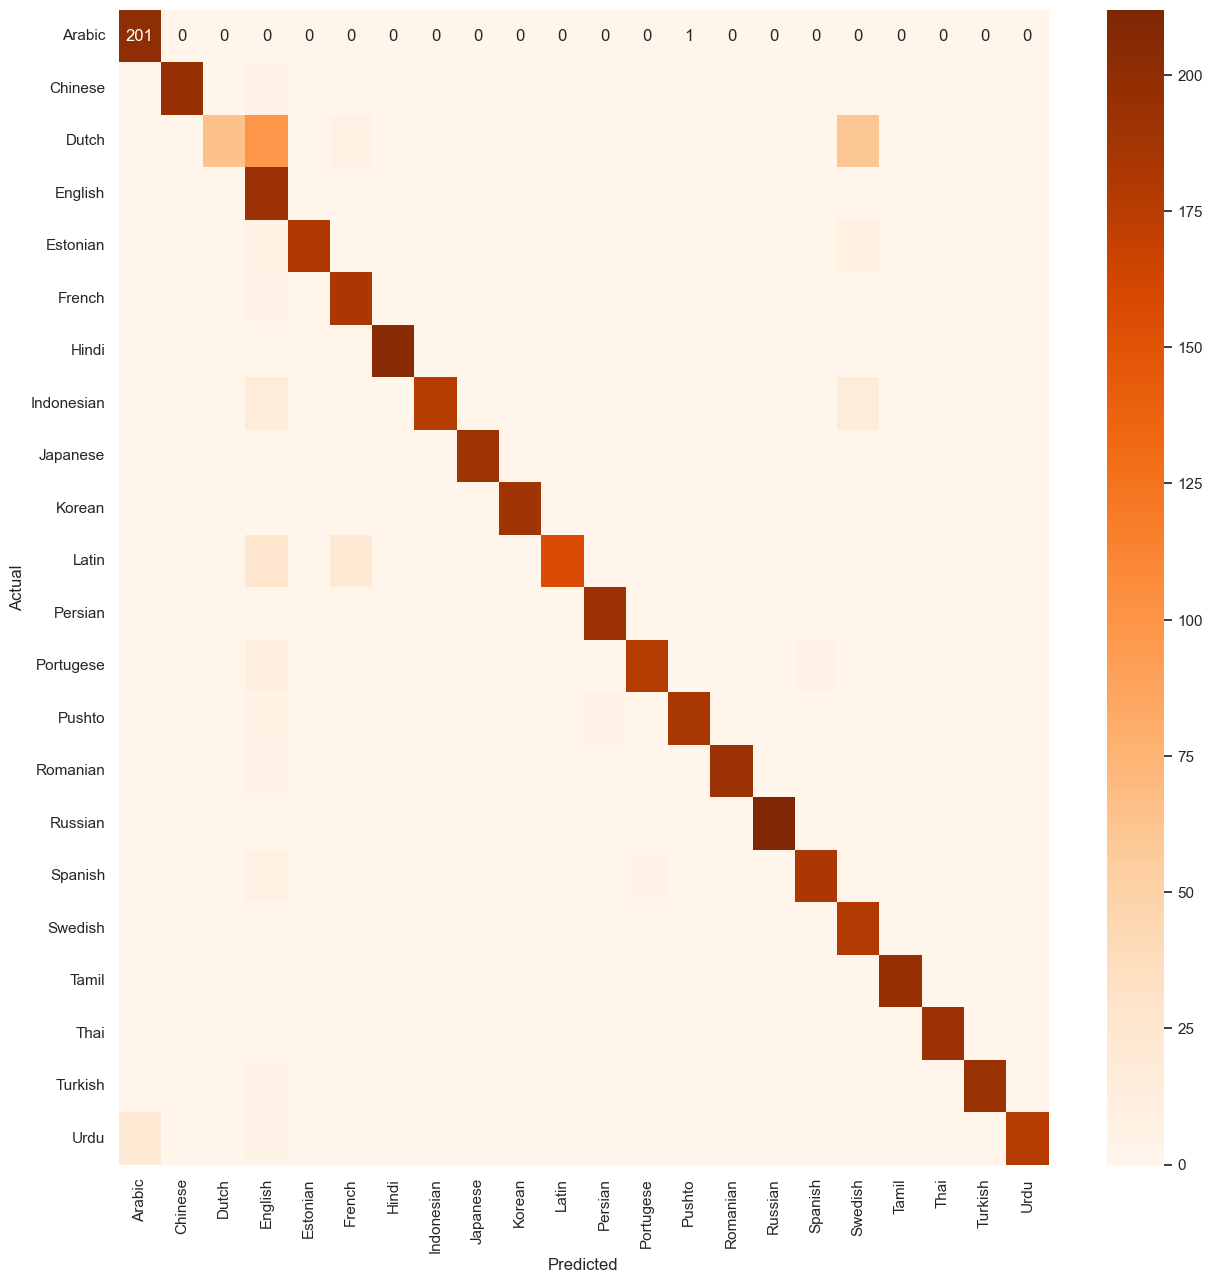

In [20]:
# Chuẩn hóa dữ liệu huấn luyện và kiểm tra cho các đặc trưng unigram
X_unigram_train, X_unigram_test = normalizeData(X_unigram_train_raw, X_unigram_test_raw)

# Áp dụng mô hình Naive Bayes lên các đặc trưng unigram
y_predict_nb_unigram = applyNaiveBayes(X_unigram_train, y_train, X_unigram_test)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, y_predict_nb_unigram)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, y_predict_nb_unigram, "Oranges")


In [21]:
# Khởi tạo và huấn luyện mô hình Multinomial Naive Bayes
clf_mnb = MultinomialNB()
clf_mnb.fit(X_unigram_train, y_train)

# Đọc và xử lý đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)

# Vector hóa dữ liệu đầu vào mới sử dụng unigramVectorizer đã được định nghĩa và huấn luyện
X_new_raw = unigramVectorizer.transform([cleaned_input])

# Chuẩn hóa đoạn văn bản đầu vào đã được vector hóa
X_new_normalized = normalize(X_new_raw, norm='l2', axis=1, copy=True, return_norm=False)

# Sử dụng mô hình Naive Bayes đã huấn luyện (clf_mnb) để dự đoán ngôn ngữ của dữ liệu đầu vào mới
y_new_predict = clf_mnb.predict(X_new_normalized)

# In ra ngôn ngữ dự đoán
print("Predicted languages:", y_new_predict)

Predicted languages: ['English']


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_14280\3980850937.py:15: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


F1: 0.9590909090909091 (micro), 0.9612216437834262 (macro), 0.9611415802731593 (weighted)


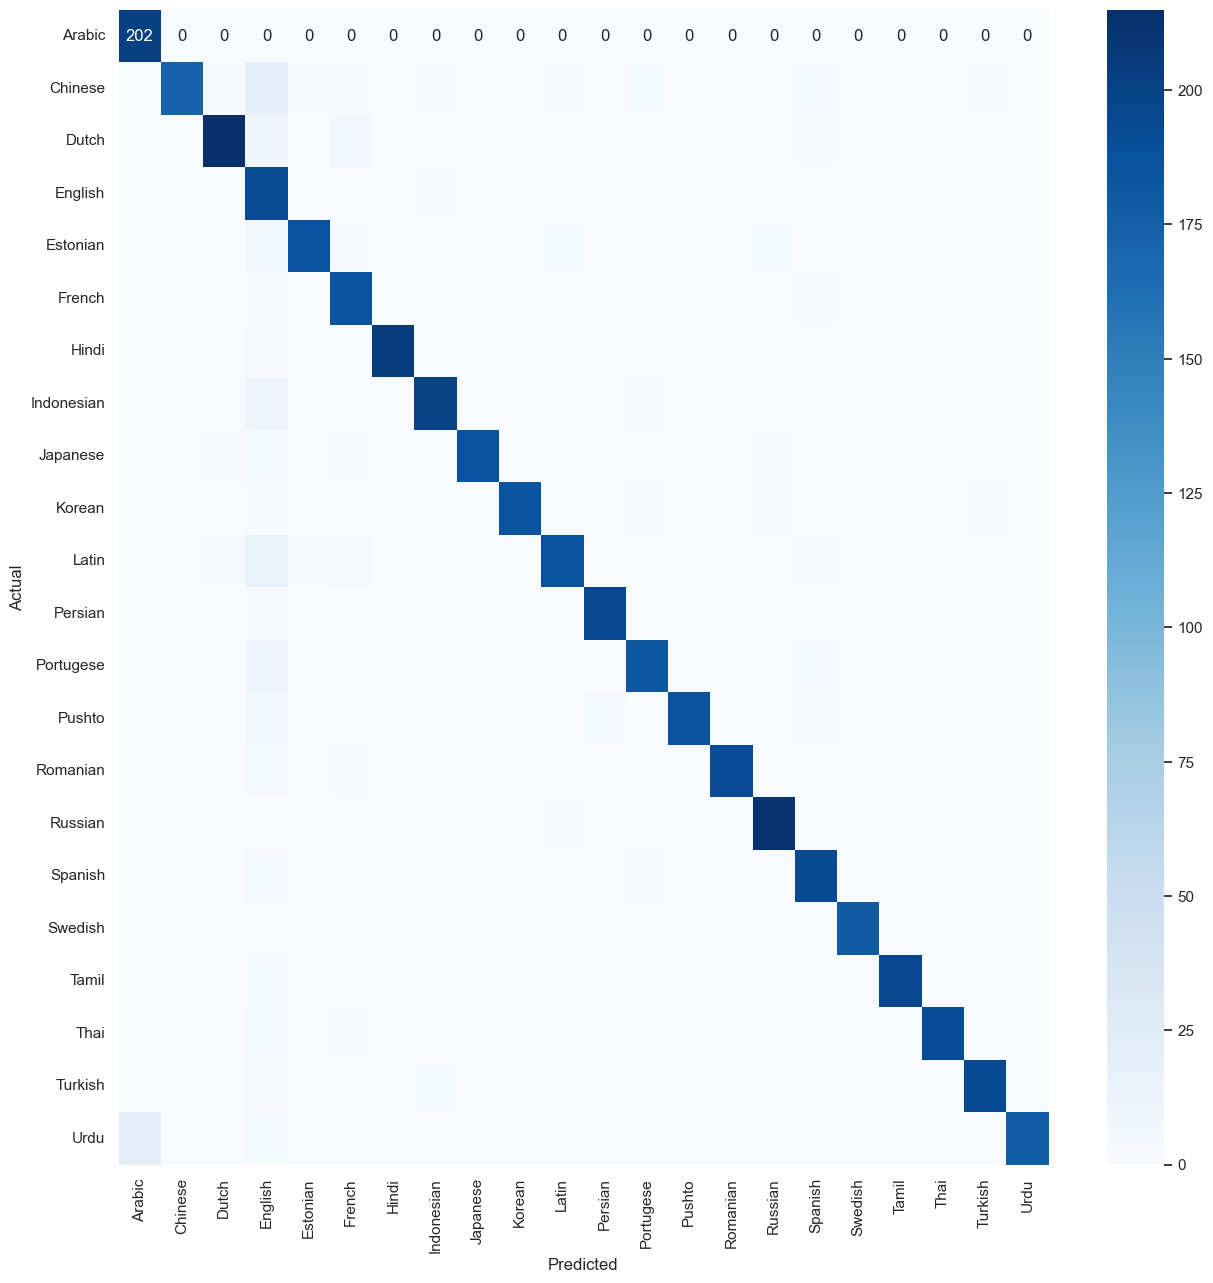

In [22]:
# Chuẩn hóa dữ liệu huấn luyện và kiểm tra bigram
X_bigram_train, X_bigram_test = normalizeData(X_bigram_train_raw, X_bigram_test_raw)

# Áp dụng mô hình Naive Bayes lên các đặc trưng bigram
y_predict_nb_bigram = applyNaiveBayes(X_bigram_train, y_train, X_bigram_test)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, y_predict_nb_bigram)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, y_predict_nb_bigram, "Blues")

In [23]:
# Khởi tạo và huấn luyện mô hình Multinomial Naive Bayes cho bigram
clf_mnb = MultinomialNB()
clf_mnb.fit(X_bigram_train, y_train)

# Đọc và xử lý đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)

# Vector hóa dữ liệu đầu vào mới sử dụng bigramVectorizer đã được định nghĩa và huấn luyện
X_new_raw = bigramVectorizer.transform([cleaned_input])

# Chuẩn hóa đoạn văn bản đầu vào đã được vector hóa
X_new_normalized = normalize(X_new_raw, norm='l2', axis=1, copy=True, return_norm=False)

# Sử dụng mô hình Naive Bayes đã huấn luyện (clf_mnb_bigram) để dự đoán ngôn ngữ của dữ liệu đầu vào mới
y_new_predict = clf_mnb.predict(X_new_normalized)

# In ra ngôn ngữ dự đoán cho bigram
print("Predicted languages for bigrams:", y_new_predict)


Predicted languages for bigrams: ['English']


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_14280\3980850937.py:15: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


F1: 0.965 (micro), 0.9662322522764432 (macro), 0.9660901890358454 (weighted)


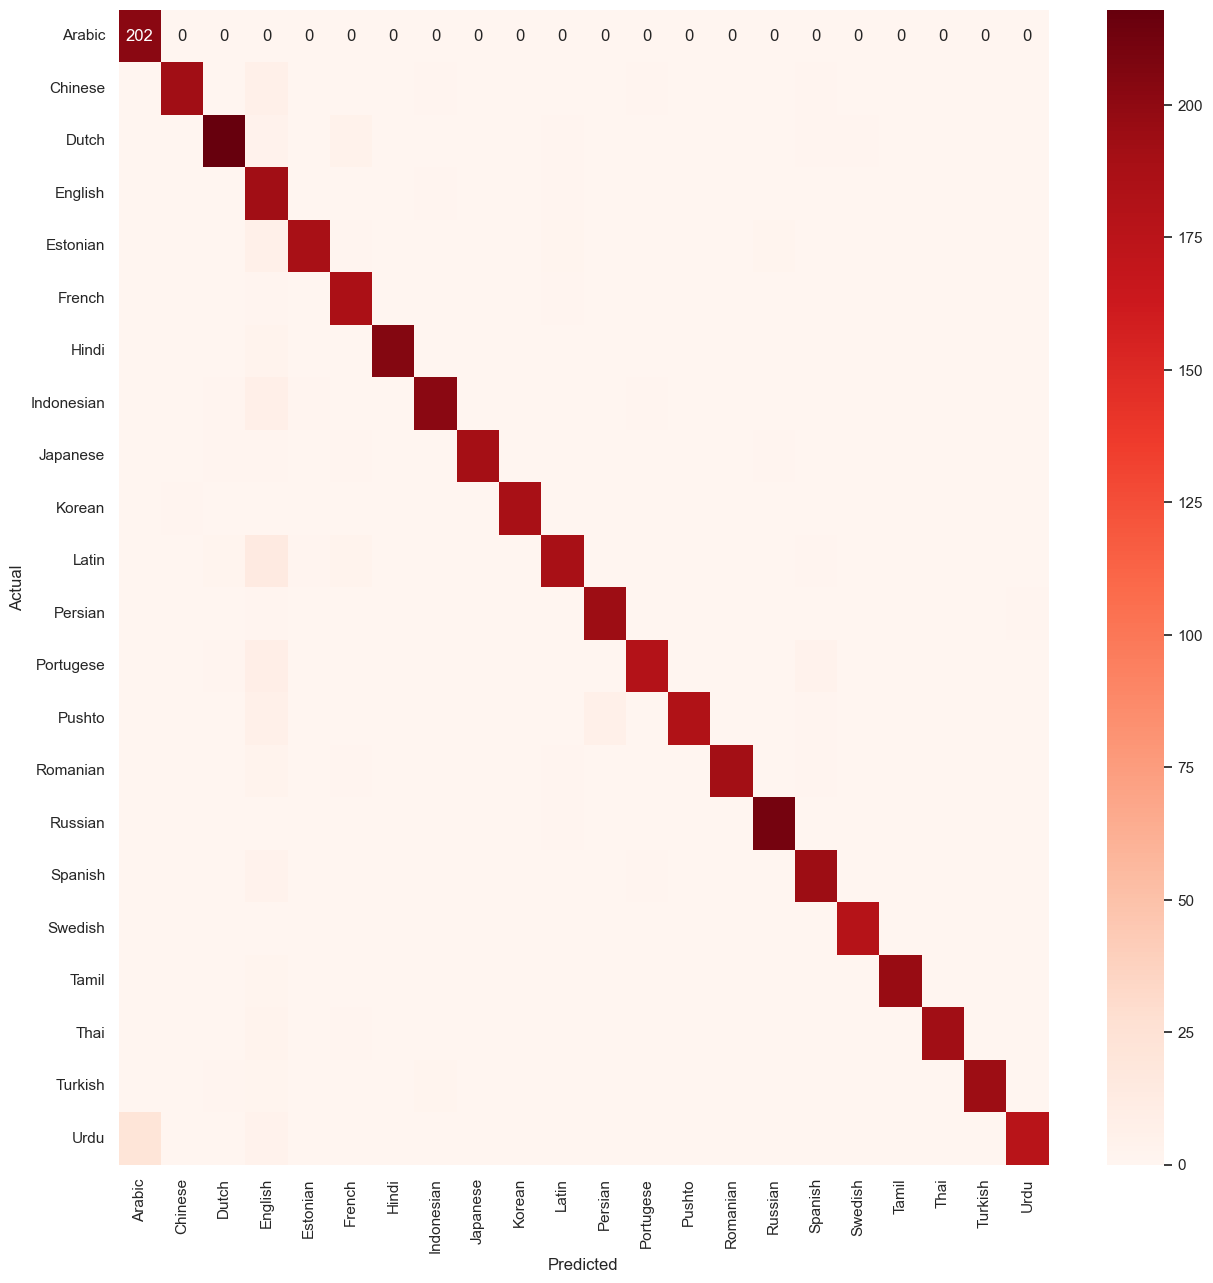

In [24]:
# Chuẩn hóa dữ liệu huấn luyện và kiểm tra top 1%
X_top1Percent_train, X_top1Percent_test = normalizeData(X_top1Percent_train_raw, X_top1Percent_test_raw)

# Áp dụng mô hình Naive Bayes lên các đặc trưng top 1%
y_predict_nb_top1Percent = applyNaiveBayes(X_top1Percent_train, y_train, X_top1Percent_test)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, y_predict_nb_top1Percent)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, y_predict_nb_top1Percent, "Reds")


In [25]:
# Khởi tạo và huấn luyện mô hình Multinomial Naive Bayes
clf_mnb = MultinomialNB()
clf_mnb.fit(X_top1Percent_train, y_train)

# Đọc và xử lý đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)

# Vector hóa dữ liệu đầu vào mới sử dụng top1PrecentMixtureVectorizer đã được định nghĩa và huấn luyện
X_new_raw = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chuẩn hóa đoạn văn bản đầu vào đã được vector hóa
X_new_normalized = normalize(X_new_raw, norm='l2', axis=1, copy=True, return_norm=False)

# Sử dụng mô hình Naive Bayes đã huấn luyện (clf_mnb) để dự đoán ngôn ngữ của dữ liệu đầu vào mới
y_new_predict = clf_mnb.predict(X_new_normalized)

# In ra ngôn ngữ dự đoán
print("Predicted languages:", y_new_predict)

Predicted languages: ['English']


F1: 0.9631818181818181 (micro), 0.9641897636446143 (macro), 0.9641848883664096 (weighted)


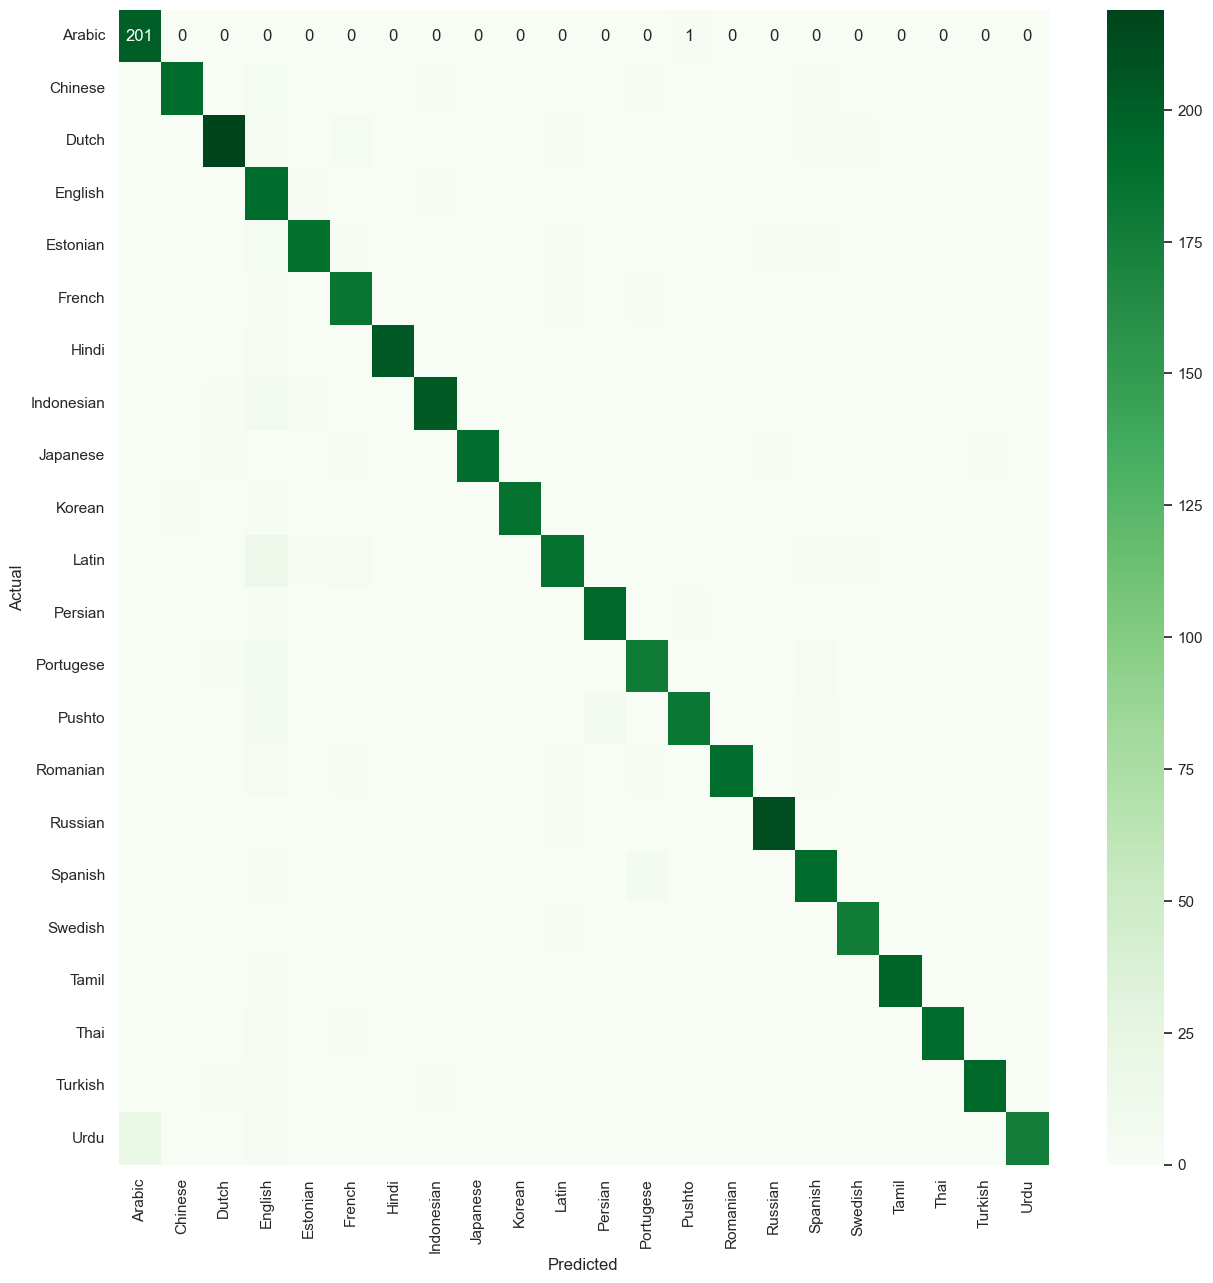

In [26]:
# Chuẩn hóa dữ liệu huấn luyện và kiểm tra top 50
X_top50_train, X_top50_test = normalizeData(X_top50_train_raw, X_top50_test_raw)

# Áp dụng mô hình Naive Bayes lên các đặc trưng top 50
y_predict_nb_top50 = applyNaiveBayes(X_top50_train, y_train, X_top50_test)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, y_predict_nb_top50)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, y_predict_nb_top50, "Greens")


In [27]:
# Xử lý và vector hóa đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)
X_input_vectorized = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chọn các đặc trưng top 50 từ đoạn văn bản đầu vào đã vector hóa
X_input_top50 = X_input_vectorized[:, relevantColumnIndices]

# Chuẩn hóa dữ liệu đầu vào
X_input_top50_normalized = normalize(X_input_top50, norm='l2', axis=1)

# Dự đoán ngôn ngữ của đoạn văn bản đầu vào sử dụng mô hình k-NN đã huấn luyện trên các đặc trưng top 50
clf_mnb_top50 = MultinomialNB()
clf_mnb_top50.fit(X_top50_train, y_train)  # X_top50_train là dữ liệu huấn luyện với các đặc trưng top 50
predicted_language_top50 = clf_mnb_top50.predict(X_input_top50_normalized)

print("Predicted Language (Top 50 Features):", predicted_language_top50)

Predicted Language (Top 50 Features): ['English']


K Nearest Neighbor

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_14280\3980850937.py:15: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  elif data_type == scipy.sparse.csr.csr_matrix:


F1: 0.9472727272727273 (micro), 0.9482633185479916 (macro), 0.9481874188298045 (weighted)


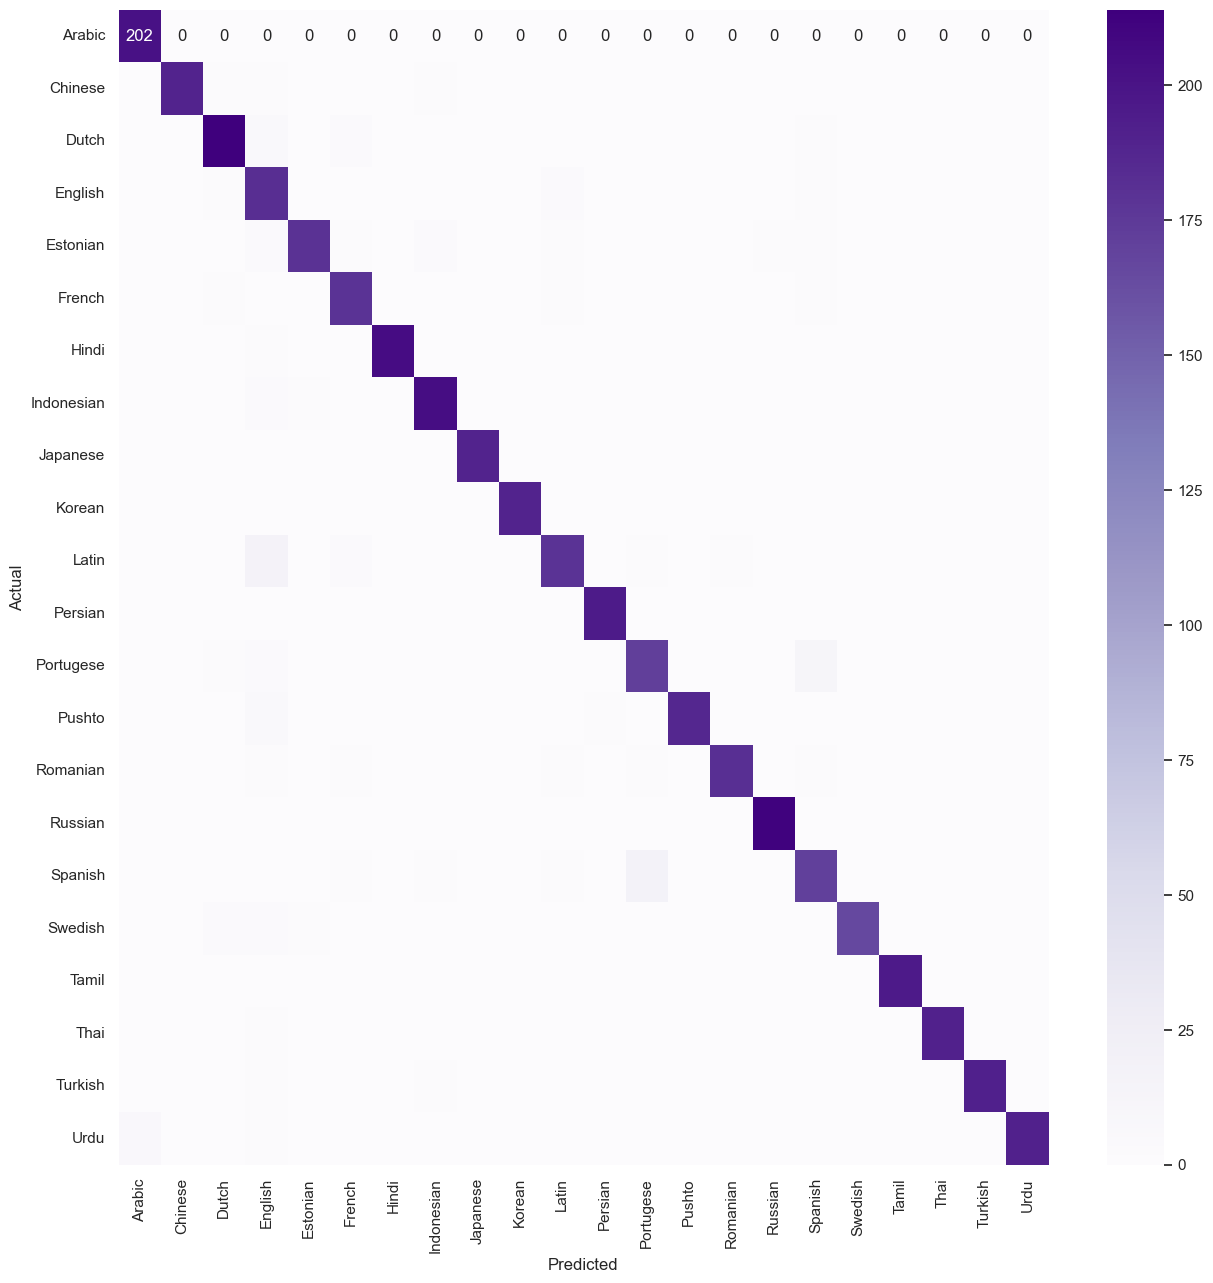

F1: 0.96 (micro), 0.9608182148535992 (macro), 0.9607606591699813 (weighted)


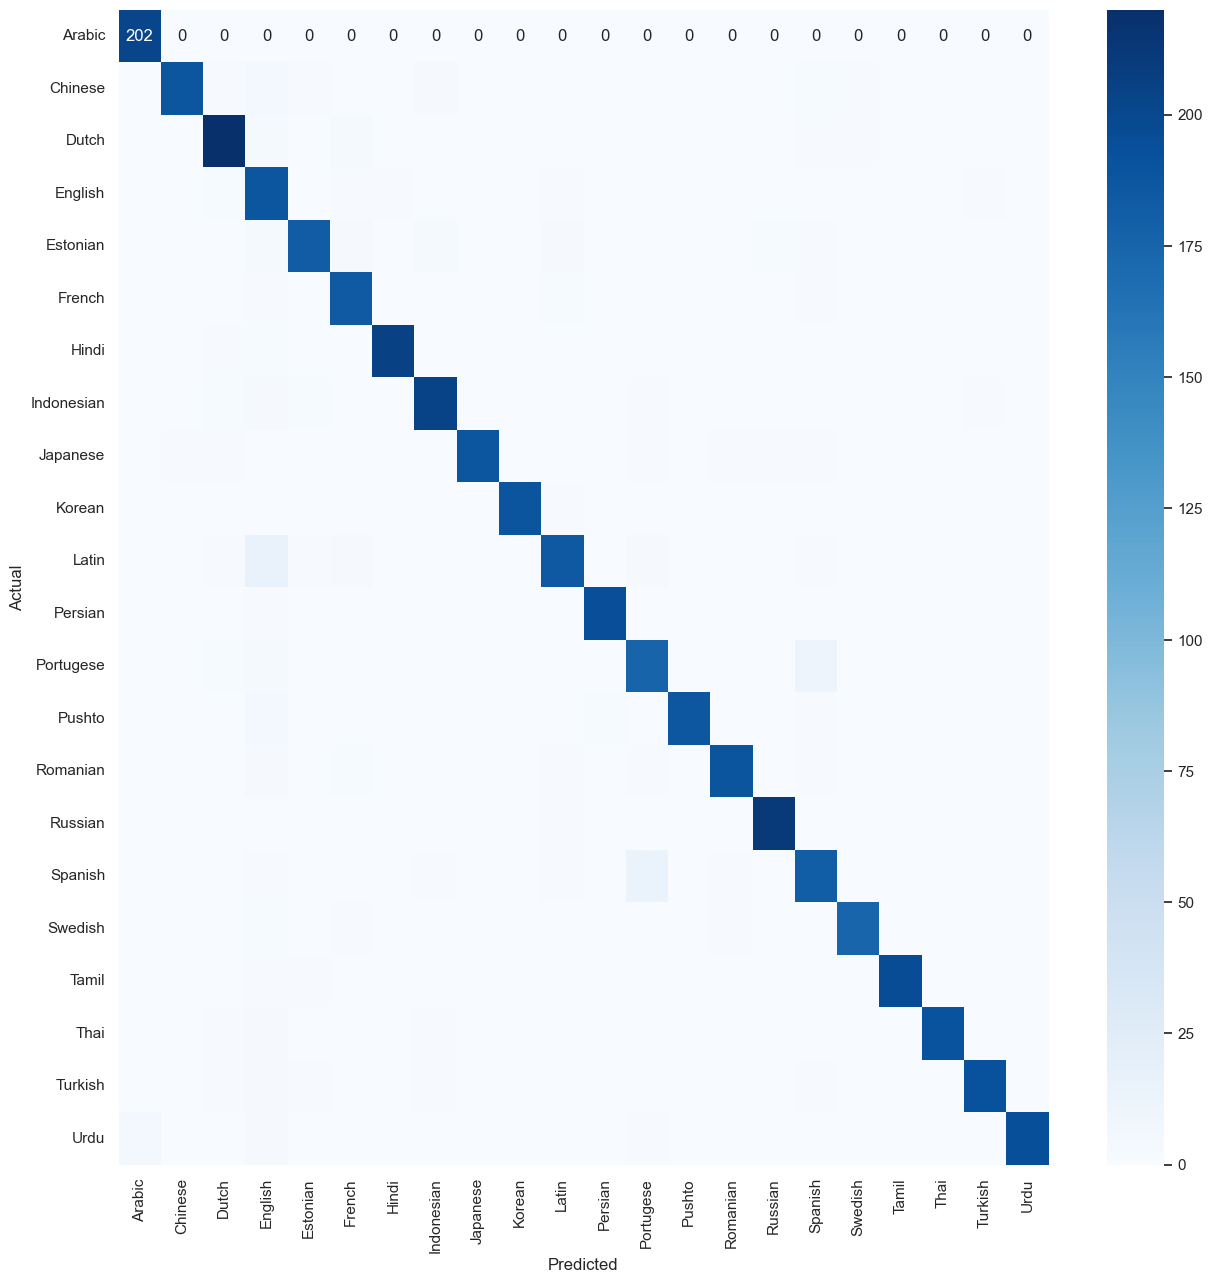

In [28]:
from sklearn.neighbors import KNeighborsClassifier

def applyNearestNeighbour(X_train, y_train, X_test):
    # Chuyển đổi dữ liệu đầu vào thành mảng NumPy
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    # Khởi tạo và huấn luyện mô hình k-Nearest Neighbors
    clf_knn = KNeighborsClassifier()
    clf_knn.fit(trainArray, y_train)
    
    # Dự đoán nhãn cho dữ liệu kiểm tra
    y_predict = clf_knn.predict(testArray)
    return y_predict

# Áp dụng k-NN trên các đặc trưng Unigram
y_predict_knn_unigram = applyNearestNeighbour(X_unigram_train, y_train, X_unigram_test)
plot_F_Scores(y_test, y_predict_knn_unigram)
plot_Confusion_Matrix(y_test, y_predict_knn_unigram, "Purples")

# Áp dụng k-NN trên các đặc trưng Top 50
y_predict_knn_top50 = applyNearestNeighbour(X_top50_train, y_train, X_top50_test)
plot_F_Scores(y_test, y_predict_knn_top50)
plot_Confusion_Matrix(y_test, y_predict_knn_top50, "Blues")


In [29]:
# Xử lý và vector hóa đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)
X_input_vectorized = unigramVectorizer.transform([cleaned_input])

# Chuẩn hóa dữ liệu đầu vào
X_input_normalized = normalize(X_input_vectorized, norm='l2', axis=1)

# Khởi tạo và huấn luyện mô hình k-Nearest Neighbors cho unigram
clf_knn_unigram = KNeighborsClassifier()
clf_knn_unigram.fit(X_unigram_train, y_train)

# Dự đoán ngôn ngữ của đoạn văn bản đầu vào sử dụng mô hình k-Nearest Neighbors đã huấn luyện
predicted_language_unigram = clf_knn_unigram.predict(X_input_normalized)

print("Predicted Language (Unigram):", predicted_language_unigram[0])


Predicted Language (Unigram): English


In [30]:
# Xử lý và vector hóa đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)
X_input_vectorized = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chọn các đặc trưng top 50 từ đoạn văn bản đầu vào đã vector hóa
X_input_top50 = X_input_vectorized[:, relevantColumnIndices]

# Chuẩn hóa dữ liệu đầu vào
X_input_top50_normalized = normalize(X_input_top50, norm='l2', axis=1)

# Khởi tạo và huấn luyện mô hình k-Nearest Neighbors cho top 50
clf_knn_top50 = KNeighborsClassifier()
clf_knn_top50.fit(X_top50_train, y_train)

# Dự đoán ngôn ngữ của đoạn văn bản đầu vào sử dụng mô hình k-Nearest Neighbors đã huấn luyện
predicted_language_top50 = clf_knn_top50.predict(X_input_top50_normalized)

print("Predicted Language (Top 50 Features):", predicted_language_top50[0])


Predicted Language (Top 50 Features): English


OLS

F1: 0.9325 (micro), 0.9333774791171735 (macro), 0.9335914624669108 (weighted)


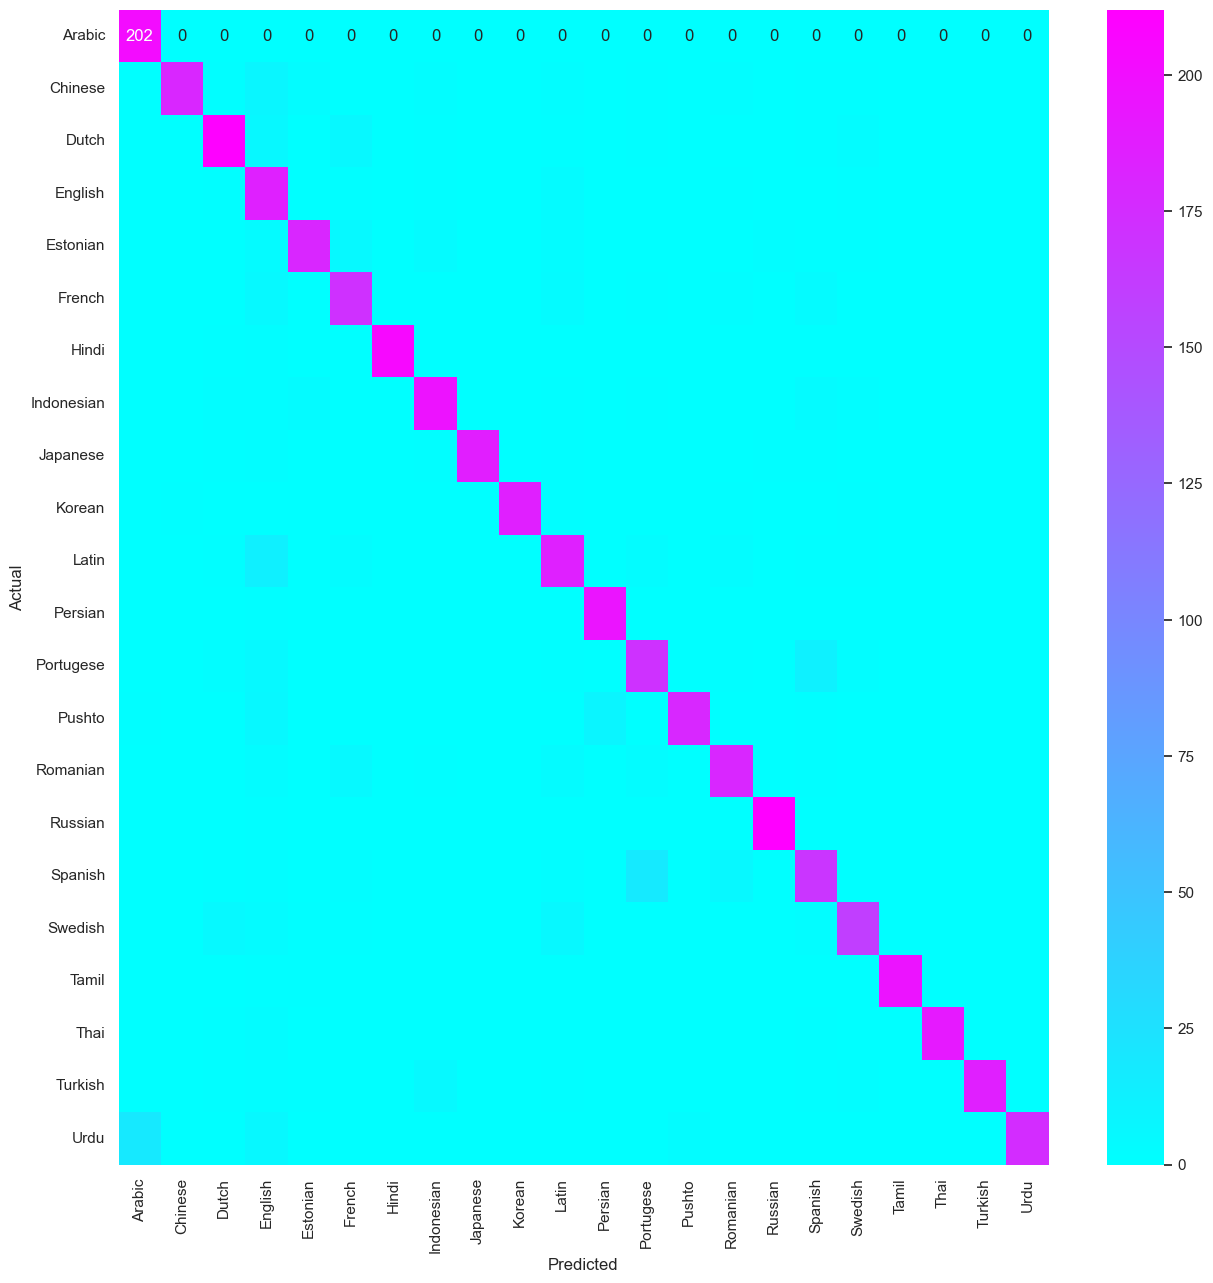

In [40]:
import numpy as np
from scipy.sparse import csr_matrix

# Hàm huấn luyện từ điển ngôn ngữ
def train_lang_dict(X_raw_counts, y_train):
    lang_dict = {}
    for i in range(len(y_train)):
        lang = y_train[i]
        v = np.array(X_raw_counts[i])
        if lang not in lang_dict:
            lang_dict[lang] = v
        else:
            lang_dict[lang] += v

    # Chuyển đổi số lượng thành tần suất tương đối
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)

    return lang_dict

# Hàm chuyển đổi số lượng thành tần suất tương đối
def toRelative(X_test):
    if isinstance(X_test, csr_matrix):
        X_test = X_test.toarray()
    return X_test / np.sum(X_test, axis=1).reshape(-1, 1)

# Áp dụng train_lang_dict cho dữ liệu huấn luyện top 50 và lấy từ điển ngôn ngữ
language_dict_top50 = train_lang_dict(X_top50_train, y_train.values)

# Chuyển đổi số lượng thành tần suất tương đối cho dữ liệu kiểm tra top 50
X_top50_test_rel = toRelative(X_top50_test)

def ols_predict(language_dict, X_test):
    def calcSquareDifference(p, q):
        return np.sum((p - q) ** 2)

    def ols(language_dict, v, langs):
        olsVector = np.array([calcSquareDifference(language_dict.get(l, np.zeros_like(v)), v) for l in langs])
        index = np.argmin(olsVector)
        return langs[index]

    langs = [l for l in language_dict]
    return [ols(language_dict, v, langs) for v in X_test]

# Áp dụng dự đoán bằng OLS để có được dự đoán ngôn ngữ cho dữ liệu kiểm tra top 50
ols_predictions = ols_predict(language_dict_top50, X_top50_test_rel)

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, ols_predictions)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, ols_predictions, 'cool')


In [41]:
# Dự đoán ngôn ngữ của đoạn văn bản đầu vào sử dụng OLS
# Xử lý và vector hóa đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)
X_input_vectorized = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chọn các đặc trưng top 50 từ đoạn văn bản đầu vào đã vector hóa
X_input_top50 = X_input_vectorized[:, relevantColumnIndices]

# Chuyển đổi số lượng thành tần suất tương đối cho dữ liệu đầu vào
X_input_top50_rel = toRelative(X_input_top50)

# Hàm dự đoán ngôn ngữ sử dụng OLS cho đoạn văn bản đầu vào
def ols_predict_single(language_dict, X_input):
    def calcSquareDifference(p, q):
        return np.sum((p - q) ** 2)

    def ols(language_dict, v, langs):
        olsVector = np.array([calcSquareDifference(language_dict.get(l, np.zeros_like(v)), v) for l in langs])
        index = np.argmin(olsVector)
        return langs[index]

    langs = [l for l in language_dict]
    return ols(language_dict, X_input, langs)

# Dự đoán ngôn ngữ cho đoạn văn bản đầu vào sử dụng OLS
predicted_language_ols = ols_predict_single(language_dict_top50, X_input_top50_rel[0])

print("Predicted Language (OLS, Top 50 Features):", predicted_language_ols)


Predicted Language (OLS, Top 50 Features): English


KS

None-Predictions: 309
F1: 0.7588636363636364 (micro), 0.7400066331959788 (macro), 0.7747995320024523 (weighted)


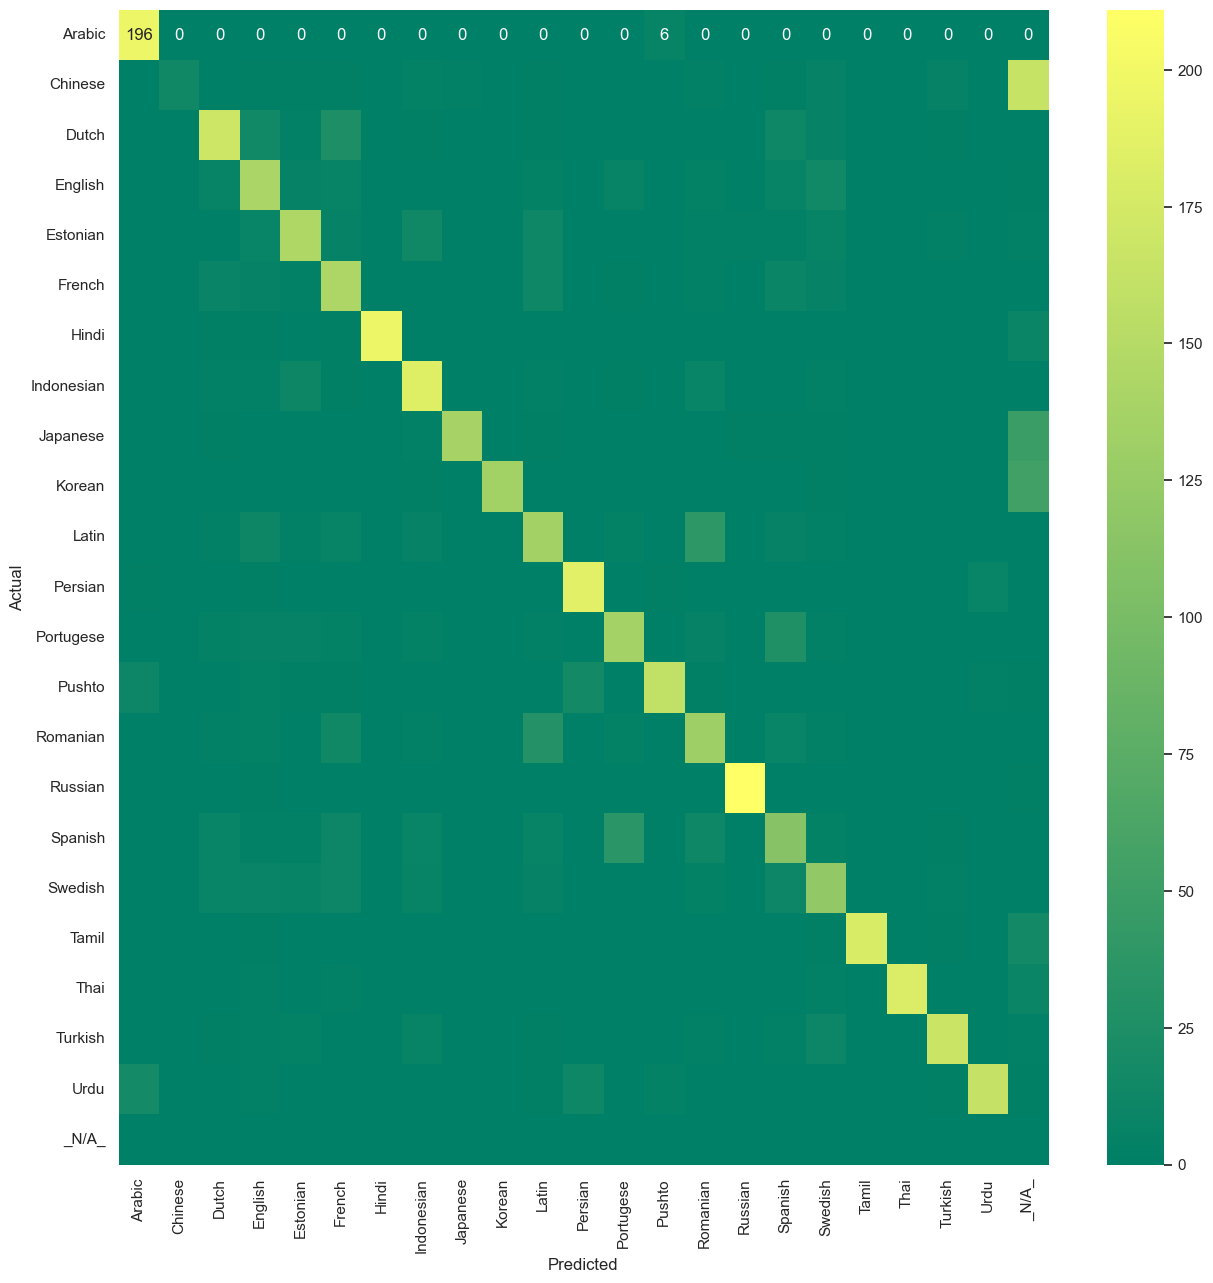

In [42]:
def ks_predict(language_dict, X_test, n, c_alpha=1.628):
    def calcMaxAbsDifference(p, q):
        return np.max(np.abs(p - q))
    
    def scaleAlpha(n, m, c_alpha):
        factor = ((n + m) / n / m) ** 0.5
        return factor * c_alpha
    
    def ks(language_dict, v, langs):
        ksVector = np.array([calcMaxAbsDifference(language_dict.get(l, np.zeros_like(v)), v) for l in langs])
        index = np.argmin(ksVector)
        m = len(v)
        scaledAlpha = scaleAlpha(n, m, c_alpha)
        if ksVector[index] <= scaledAlpha:
            return langs[index]
        else:
            return '_N/A_'
    
    langs = [l for l in language_dict]
    return [ks(language_dict, v, langs) for v in X_test]

# Áp dụng dự đoán bằng phương pháp KS trên các đặc trưng top 50
ks_predictions = ks_predict(language_dict_top50, X_top50_test_rel, 356 * 800)

# In ra số lượng dự đoán không xác định
print('None-Predictions:', (np.array(ks_predictions) == '_N/A_').sum())

# Vẽ các điểm số F1 cho các trung bình micro, macro và weighted
plot_F_Scores(y_test, ks_predictions)

# Vẽ ma trận Confusion sử dụng biểu đồ nhiệt
plot_Confusion_Matrix(y_test, ks_predictions, 'summer')


In [43]:
# Giả định một giá trị giữ chỗ cho 'n', tổng số
n = 356 * 800  # Điều này sẽ được thay thế bằng tổng số thực tế từ tập dữ liệu của bạn

# Xử lý đoạn văn bản đầu vào
cleaned_input = clean_text(input_text)

# Vector hóa đoạn văn bản đầu vào sử dụng vectorizer đã sử dụng cho các đặc trưng Top 50
X_input_vectorized = top1PrecentMixtureVectorizer.transform([cleaned_input])

# Chọn các đặc trưng Top 50 từ đoạn văn bản đầu vào đã vector hóa
X_input_top50 = X_input_vectorized.toarray()[:, relevantColumnIndices]

# Chuyển đổi số lượng thành tần suất tương đối cho đoạn văn bản đầu vào
X_input_top50_rel = [v / np.sum(v) if np.sum(v) > 0 else [0]*len(v) for v in X_input_top50]

# Kiểm tra xem X_input_top50_rel không trống và không chứa lỗi chia cho 0
if len(X_input_top50_rel) == 0 or np.isnan(X_input_top50_rel).any():
    raise ValueError("The input paragraph does not contain any of the Top 50 features or has a division by zero.")

# Áp dụng dự đoán bằng phương pháp KS cho tần suất tương đối của các đặc trưng Top 50 của đoạn văn bản đầu vào
ks_prediction_input = ks_predict(language_dict_top50, X_input_top50_rel, n)

# In ra ngôn ngữ dự đoán cho đoạn văn bản đầu vào
print("Predicted Language for Input Paragraph (Top 50 Features):", ks_prediction_input)


Predicted Language for Input Paragraph (Top 50 Features): ['English']


Langdetect

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
F1: 0.8329545454545455 (micro), 0.5293264298123913 (macro), 0.820032141991453 (weighted)


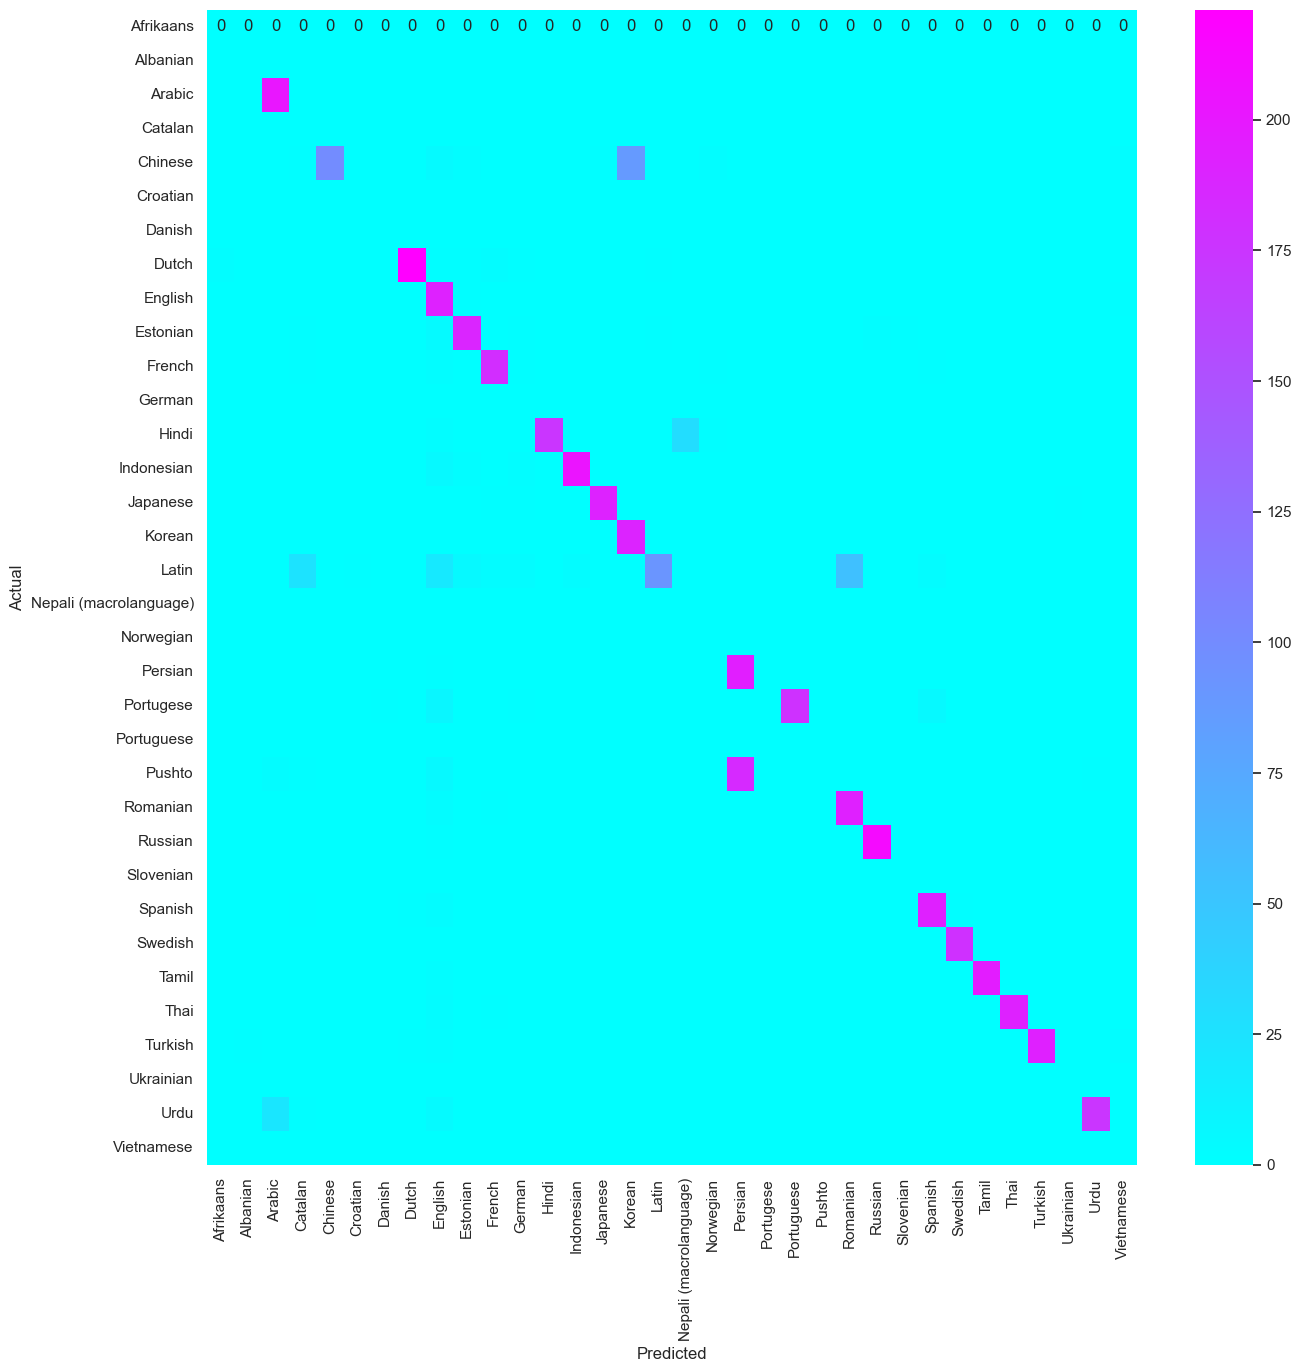

In [33]:
!pip install langdetect
!pip install iso-639

from langdetect import detect
from iso639 import languages

# Hàm để kiểm chứng ngôn ngữ đã phát hiện
def proofLanguage(text):
    # Lấy mã ngôn ngữ gồm hai chữ cái sử dụng langdetect
    twoLetterCode = detect(text)[:2]  # Gộp lại các ngôn ngữ 2 tiếng

    # Xử lý các trường hợp đặc biệt
    if twoLetterCode == 'it':  # Italian -> Latin
        return 'Latin'
    elif twoLetterCode == 'pt':  # Portuguese -> Portugese
        return 'Portuguese'
    else:
        # Sử dụng thư viện iso639 để lấy tên ngôn ngữ tiếng Anh dựa trên mã hai chữ cái
        lang = languages.get(alpha2 = twoLetterCode)
        langName = lang.name

        # Nếu không có tên tiếng Anh, trả về mã hai chữ cái
        if langName is not None:
            return langName
        return twoLetterCode

# Áp dụng hàm proofLanguage để có được nhãn ngôn ngữ thực tế cho X_test
y_test_proof = [proofLanguage(t) for t in X_test]

plot_F_Scores(y_test, y_test_proof)
plot_Confusion_Matrix(y_test, y_test_proof, 'cool')

In [34]:
# Nhập hàm detect từ langdetect
from langdetect import detect
from iso639 import languages

# Định nghĩa hàm để lấy tên ngôn ngữ đầy đủ từ mã ISO 639-1 gồm hai chữ cái
def get_language_name(two_letter_code):
    try:
        lang = languages.get(part1=two_letter_code)
        return lang.name
    except KeyError:
        return two_letter_code  # Trả về mã ngôn ngữ nếu không tìm thấy tên ngôn ngữ

# Hàm để phát hiện ngôn ngữ của một đoạn văn bản
def detect_language(text):
    two_letter_code = detect(text)
    return get_language_name(two_letter_code)

# Sử dụng hàm detect_language để xác định ngôn ngữ của input_paragraph
predicted_language = detect_language(input_text)

# In ra ngôn ngữ dự đoán
print("Predicted Language:",predicted_language)

Predicted Language: English


Kiểm tra các trường hợp đúng và sai của dự đoán

In [35]:
def plotTopErrors(y_predict, top=5):
    # Lấy nhãn thực tế và dữ liệu văn bản
    ys = y_test.values
    Xs = X_test.values
    
    # Bộ đếm để theo dõi số lượng lỗi
    errorCount = 0
    
    # Lặp qua các dự đoán và nhãn thực tế
    for i in range(len(ys)):
        # Kiểm tra nếu nhãn dự đoán khác với nhãn thực tế
        if not ys[i] == y_predict[i]:
            errorCount += 1
            
            # In thông tin về lỗi
            print("#{}: Expected: {}, Predicted: {}".format(errorCount, ys[i], y_predict[i]))
            print("Text:", Xs[i])
            print("=================================================")
            
        # Dừng vòng lặp nếu đạt đến số lượng lỗi cần hiển thị
        if errorCount >= top:
            break


In [36]:
# Giả sử y_predict_nb_top50 chứa các nhãn dự đoán cho X_top50_test
plotTopErrors(y_predict_nb_top50, top=5)
# Giả sử y_predict_nb_unigram chứa các nhãn dự đoán cho X_unigram_test
plotTopErrors(y_predict_nb_unigram, top=5)
# Giả sử ks_predictions chứa các nhãn dự đoán cho X_top50_test_rel
plotTopErrors(ks_predictions, top=5)

#1: Expected: Urdu, Predicted: English
Text: belowwasthelistofthetypesofsportsplayedintheseagfromthebulletmarkindicatesthatthesportwasplayedintherespectiveyear
#2: Expected: Portugese, Predicted: Dutch
Text: stephenmidgleypeterstevensbenrichardsonpaulgioianicholaslanderworldwidewattlewebseiteüberdieakazienmiteinemschwerpunktaufdieaustralischenarten
#3: Expected: Korean, Predicted: English
Text: 축생도畜生道산스크리트어tiyagyonitiryañctiryaṅmārga팔리어tiracchānayoni또는축생畜生산스크리트어tiryañc팔리어tiracchāna은벌레곤충어류조류짐승을포함한온갖동물생명체를통칭하는데축생에는사람의몸속에사는미세생명체도포함되며용용왕가루다와같은신화적이거나신적인생명체도포함된다
#4: Expected: Spanish, Predicted: English
Text: comoactrizhatrabajadoparaproductorascomoevilangelgirlfriendsfilmswickedbrazzerssweetheartvideonaughtyamericamilehighpureplaymediaforbiddenfruitsfilmsmilehighdigitalsinohardx
#5: Expected: Thai, Predicted: English
Text: moralesfjarribaslorenzogtheformationofpotentiallyharmfulcompoundsinchurrosaspanishfrieddoughpastryasinfluencedbydeepfryingconditionsfoodchemistry
#1: Expected: Dutch, Pre

In [37]:
def plotCorrectPredictions(y_true, y_pred, top=5):
     # Lấy nhãn thực tế và dữ liệu văn bản
    ys = y_true.values
    Xs = X_test.values
    
    # Bộ đếm để theo dõi số lượng dự đoán đúng
    correctCount = 0
    
    # Lặp qua các dự đoán và nhãn thực tế
    for i in range(len(ys)):
        # Kiểm tra nếu nhãn dự đoán khớp với nhãn thực tế
        if ys[i] == y_pred[i]:
            correctCount += 1
            
            # In thông tin về dự đoán đúng
            print("#{}: Predicted: {}, Correctly Predicted: {}".format(correctCount, y_pred[i], ys[i]))
            print("Text:", Xs[i])
            print("=================================================")
            
        # Dừng vòng lặp nếu đạt đến số lượng dự đoán đúng cần hiển thị
        if correctCount >= top:
            break


In [38]:
# Naive Bayes trên Unigrams
print("Naive Bayes on Unigrams")
plotCorrectPredictions(y_test, y_predict_nb_unigram, top=5)

# Naive Bayes trên Mix Top 50
print("Naive Bayes on Mix Top 50")
plotCorrectPredictions(y_test, y_predict_nb_top50, top=5)

# Naive Bayes trên Mix Top 1%
print("Naive Bayes on Mix Top 1%")
plotCorrectPredictions(y_test, y_predict_nb_top1Percent, top=5)

# kNN trên Mix Top 50
print("kNN on Mix Top 50")
plotCorrectPredictions(y_test, y_predict_knn_top50, top=5)

# OLS trên Mix Top 50
print("OLS on Mix Top 50")
plotCorrectPredictions(y_test, ols_predictions, top=5)

# Langdetect
y_predict_langdetect = [detect(text) for text in X_test]  
print("langdetect")
plotCorrectPredictions(y_test, y_predict_langdetect, top=5)

# KS trên Mix Top 50
print("KS on Mix Top 50")
plotCorrectPredictions(y_test, ks_predictions, top=5)


Naive Bayes on Unigrams
#1: Predicted: Japanese, Correctly Predicted: Japanese
Text: 武器システムにおいては上述の通りアスロック対潜ミサイルのmkgmlsmk連装発射機などにかえてqhdash無人対潜ヘリコプター機の運用設備を設置していることが最大の変更点であるdashはアスロックをはるかに上回る長距離の対潜火力として期待された期待の新装備であったしかしアメリカ海軍においては事故が多発したために年昭和年には運用中止となり予備部品の供給途絶に伴って海上自衛隊でも年昭和年運用中止となったこのことからdashの運用設備をshflampsmkiヘリコプター用に転用する案があったが実現せず結局年及び年にこれを撤去しアスロックに換装して兵装面ではやまぐも型と同一になったなお番艦むらくもddkは他の隻より先行して年昭和年に改装を実施したことからミサイルの装填機構等はddkと同様の機力補助人力式であるが他の隻は年遅い年昭和年に改装工事を実施したことからはつゆき型護衛艦と同形式の直接装填装置が搭載された
#2: Predicted: Russian, Correctly Predicted: Russian
Text: вапрелегодаломоносовзадерзкоеповедениеприакадемическихраспряхмеждурусскойинемецкойпартиямибылзаключёнподстражунамесяцевтолькоянварягодасенатзаслушавдокладследственнойкомиссиипостановилоногоадъюнкталомоносовадляегодовольногообученияотнаказанияосвободитьавообъявленныхимпродерзостяхупрофессоровпроситьпрощенияижалованьеемувтечениегодавыдаватьполовинноевэтовремяизгерманииприезжаетженаелизаветаследуетотметитьчтоборьбанемецкойиантинемецкойпартиивакадем

Báo cáo về thông số độ chính xác

In [39]:
from sklearn.metrics import accuracy_score, classification_report

# NB trên Unigrams
print("Naive Bayes on Unigrams:")
print("Accuracy:", accuracy_score(y_test, y_predict_nb_unigram))
print(classification_report(y_test, y_predict_nb_unigram))

# NB trên Bigrams
print("Naive Bayes on Bigrams:")
print("Accuracy:", accuracy_score(y_test, y_predict_nb_bigram))
print(classification_report(y_test, y_predict_nb_bigram))

# NB trên Mix Top 50
print("Naive Bayes on Mix Top 50:")
print("Accuracy:", accuracy_score(y_test, y_predict_nb_top50))
print(classification_report(y_test, y_predict_nb_top50))

# NB trên Mix Top 1%
print("Naive Bayes on Mix Top 1%:")
print("Accuracy:", accuracy_score(y_test, y_predict_nb_top1Percent))
print(classification_report(y_test, y_predict_nb_top1Percent))

# KNN trên Mix Top 50
print("k-Nearest Neighbors on Mix Top 50:")
print("Accuracy:", accuracy_score(y_test, y_predict_knn_top50))
print(classification_report(y_test, y_predict_knn_top50))

# OLS trên Mix Top 50
print("Ordinary Least Squares on Mix Top 50:")
print("Accuracy:", accuracy_score(y_test, ols_predictions))
print(classification_report(y_test, ols_predictions))

# Langdetect
print("langdetect:")
print("Accuracy:", accuracy_score(y_test, y_predict_langdetect))
print(classification_report(y_test, y_predict_langdetect))

# KS trên Mix Top 50
print("Kolmogorov-Smirnov on Mix Top 50:")
print("Accuracy:", accuracy_score(y_test, ks_predictions))
print(classification_report(y_test, ks_predictions))

Naive Bayes on Unigrams:
Accuracy: 0.9120454545454545
              precision    recall  f1-score   support

      Arabic       0.91      1.00      0.95       202
     Chinese       0.99      0.98      0.98       201
       Dutch       1.00      0.28      0.44       230
     English       0.48      0.99      0.65       194
    Estonian       0.98      0.90      0.94       200
      French       0.84      0.97      0.90       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       0.98      0.83      0.90       213
    Japanese       1.00      0.98      0.99       194
      Korean       1.00      0.99      1.00       190
       Latin       0.99      0.74      0.85       210
     Persian       0.97      0.98      0.98       196
   Portugese       0.95      0.92      0.93       194
      Pushto       0.98      0.94      0.96       196
    Romanian       0.99      0.97      0.98       197
     Russian       0.99      1.00      0.99       213
     Spanish       0.98    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla